# This script contains the following:
1. Importing libraries and data and renaming columns
2. The elbow technique
3. k-means clustering

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path  = r'/Users/lupeguevara/Documents/DOE Demographic Snapshot'

In [4]:
path

'/Users/lupeguevara/Documents/DOE Demographic Snapshot'

In [5]:
# Importing cleaned dataset
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'hardship_enrollment.pkl'))

In [6]:
df.shape

(7141, 39)

In [7]:
# Set the maximum number of columns to be displayed to None
pd.set_option('display.max_columns', None)

# Now display your DataFrame
print(df)

     District Borough Number                               School Name  \
1                     01M015                 P.S. 015 Roberto Clemente   
2                     01M015                 P.S. 015 Roberto Clemente   
3                     01M015                 P.S. 015 Roberto Clemente   
4                     01M015                 P.S. 015 Roberto Clemente   
6                     01M019                       P.S. 019 Asher Levy   
...                      ...                                       ...   
8859                  84X718  Bronx Charter School for Better Learning   
8861                  84X730         Bronx Charter School for the Arts   
8862                  84X730         Bronx Charter School for the Arts   
8863                  84X730         Bronx Charter School for the Arts   
8864                  84X730         Bronx Charter School for the Arts   

         Year  Total Enrollment  Grade PK  Grade K  Grade 1  Grade 2  Grade 3  \
1     2014-15               18

In [8]:
df.head()

,District Borough Number,School Name,Year,Total Enrollment,Grade PK,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,% Female,% Male,% Asian,% Black,% Hispanic,% Multiple Race,% White,% Students with Disabilities,% English Language Learners,% Poverty,% Economic Need Index,Location,Grades,Address,State,X_COORDINATE,Y_COORDINATE,LONGITUDE,LATITUDE,Neighborhood,Coordinates
1,01M015,P.S. 015 Roberto Clemente,2014-15,183,18,27,47,31,19,17,24,0,0,0,0,0,0,0,45.9,54.1,4.4,35.5,58.5,0.5,1.1,35.0,9.3,92.3,93.5,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
2,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,18,0,0,0,0,0,0,0,47.2,52.8,5.1,32.4,59.7,1.7,1.1,34.1,9.1,84.7,89.6,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
3,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,18,0,0,0,0,0,0,0,46.6,53.4,7.9,28.7,59.0,2.2,2.2,28.7,6.7,85.4,89.2,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
4,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,26,0,0,0,0,0,0,0,52.1,47.9,10.5,27.4,57.9,1.1,3.2,23.7,4.2,84.7,89.0,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
6,01M019,P.S. 019 Asher Levy,2014-15,270,30,44,40,39,35,40,42,0,0,0,0,0,0,0,48.9,51.1,11.1,17.4,58.5,3.0,10.0,30.4,6.7,74.1,60.9,Elementary,"PK,0K,01,02,03,04,05",185 1 AVENUE,NY,988547.0,205239.0,-73.984496,40.730009,East Village,"(40.730009, -73.984496)"


In [9]:
df.rename(columns = {'Grade PK (Half Day & Full Day)' : 'Grade PK', '% Multiple Race Categories Not Represented' : '% Multiple Race' }, inplace = True)

In [10]:
df.columns

Index(['District Borough Number', 'School Name', 'Year', 'Total Enrollment',
       'Grade PK', 'Grade K', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4',
       'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8', 'Grade 9', 'Grade 10',
       'Grade 11', 'Grade 12', '% Female', '% Male', '% Asian', '% Black',
       '% Hispanic', '% Multiple Race', '% White',
       '% Students with Disabilities', '% English Language Learners',
       '% Poverty', '% Economic Need Index', 'Location', 'Grades', 'Address',
       'State', 'X_COORDINATE', 'Y_COORDINATE', 'LONGITUDE', 'LATITUDE',
       'Neighborhood', 'Coordinates'],
      dtype='object')

In [11]:
# Create a subset which only contains numerical variables

sub = df[['Total Enrollment', '% Female', '% Male', '% Asian', '% Black', '% Hispanic', '% Multiple Race', '% White', '% Students with Disabilities', '% English Language Learners', '% Poverty', '% Economic Need Index', 'LONGITUDE', 'LATITUDE']]

In [12]:
# Checking the subset
sub.head()

,Total Enrollment,% Female,% Male,% Asian,% Black,% Hispanic,% Multiple Race,% White,% Students with Disabilities,% English Language Learners,% Poverty,% Economic Need Index,LONGITUDE,LATITUDE
1,183,45.9,54.1,4.4,35.5,58.5,0.5,1.1,35.0,9.3,92.3,93.5,-73.978747,40.722075
2,176,47.2,52.8,5.1,32.4,59.7,1.7,1.1,34.1,9.1,84.7,89.6,-73.978747,40.722075
3,178,46.6,53.4,7.9,28.7,59.0,2.2,2.2,28.7,6.7,85.4,89.2,-73.978747,40.722075
4,190,52.1,47.9,10.5,27.4,57.9,1.1,3.2,23.7,4.2,84.7,89.0,-73.978747,40.722075
6,270,48.9,51.1,11.1,17.4,58.5,3.0,10.0,30.4,6.7,74.1,60.9,-73.984496,40.730009


# The elbow technique

In [13]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [14]:
# Create a score that represents a rate of variation for the given cluster option

score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))]

score

/Users/lupeguevara/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lupeguevara/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lupeguevara/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lupeguevara/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

[-1548854185.3633633,
 -710579757.1578605,
 -347911237.84576094,
 -204535522.34009704,
 -137961083.96953732,
 -105038726.05214188,
 -82745526.2147414,
 -71619466.45160161,
 -61251030.81443162]

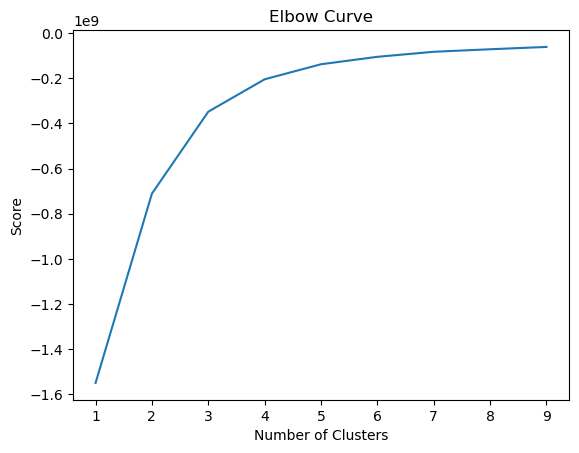

In [15]:
# Plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The elbow (the breaking point of the curve) is where the curve begins to flatten. In this case, we can observe that it jumps from two to three on the X-axis and then increases slightly after three. That's why I believe that the optimal number of clusters is four.

# k-means clustering

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

In [17]:
#fit kmeans object to dataframe 
kmeans.fit(sub)

/Users/lupeguevara/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [18]:
sub['clusters'] = kmeans.fit_predict(sub)

/Users/lupeguevara/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/bw/cptkzcgn0rg6xj7czmdw2bl80000gn/T/ipykernel_32075/3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [19]:
sub.head()

,Total Enrollment,% Female,% Male,% Asian,% Black,% Hispanic,% Multiple Race,% White,% Students with Disabilities,% English Language Learners,% Poverty,% Economic Need Index,LONGITUDE,LATITUDE,clusters
1,183,45.9,54.1,4.4,35.5,58.5,0.5,1.1,35.0,9.3,92.3,93.5,-73.978747,40.722075,1
2,176,47.2,52.8,5.1,32.4,59.7,1.7,1.1,34.1,9.1,84.7,89.6,-73.978747,40.722075,1
3,178,46.6,53.4,7.9,28.7,59.0,2.2,2.2,28.7,6.7,85.4,89.2,-73.978747,40.722075,1
4,190,52.1,47.9,10.5,27.4,57.9,1.1,3.2,23.7,4.2,84.7,89.0,-73.978747,40.722075,1
6,270,48.9,51.1,11.1,17.4,58.5,3.0,10.0,30.4,6.7,74.1,60.9,-73.984496,40.730009,1


In [20]:
# Check the frequency of each unique value in the 'clusters' column

sub['clusters'].value_counts()

clusters
1    4186
3    2313
0     564
2      78
Name: count, dtype: int64

# Scatterplots

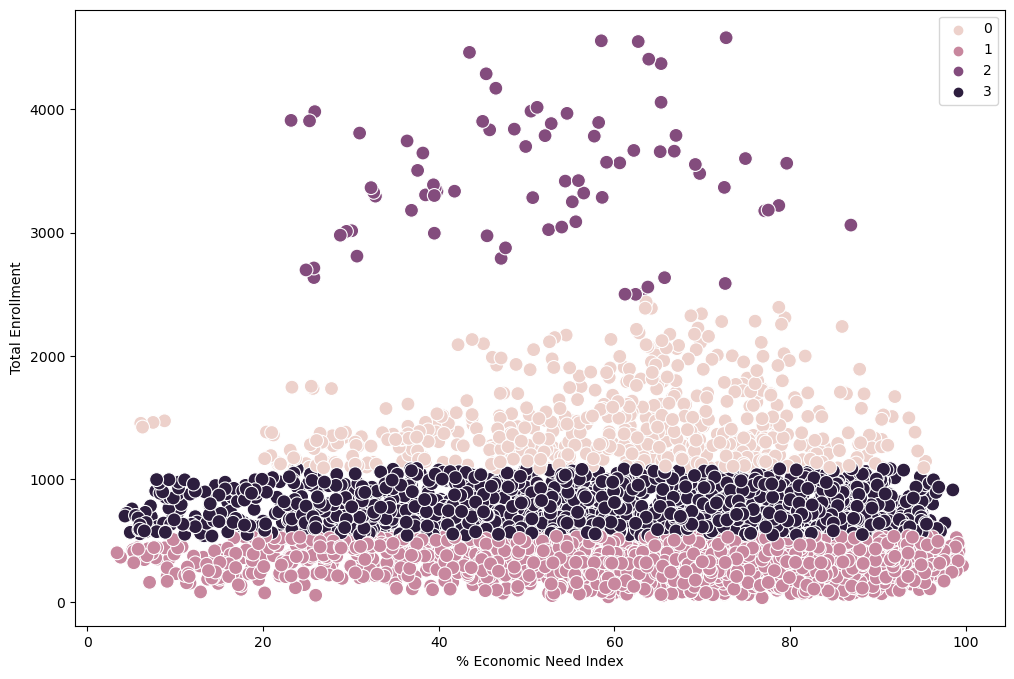

In [21]:
# Plot the clusters for the "Total Enrollment" and "Economic Need" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['% Economic Need Index'], y = sub['Total Enrollment'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('% Economic Need Index')
plt.ylabel('Total Enrollment')
plt.show()

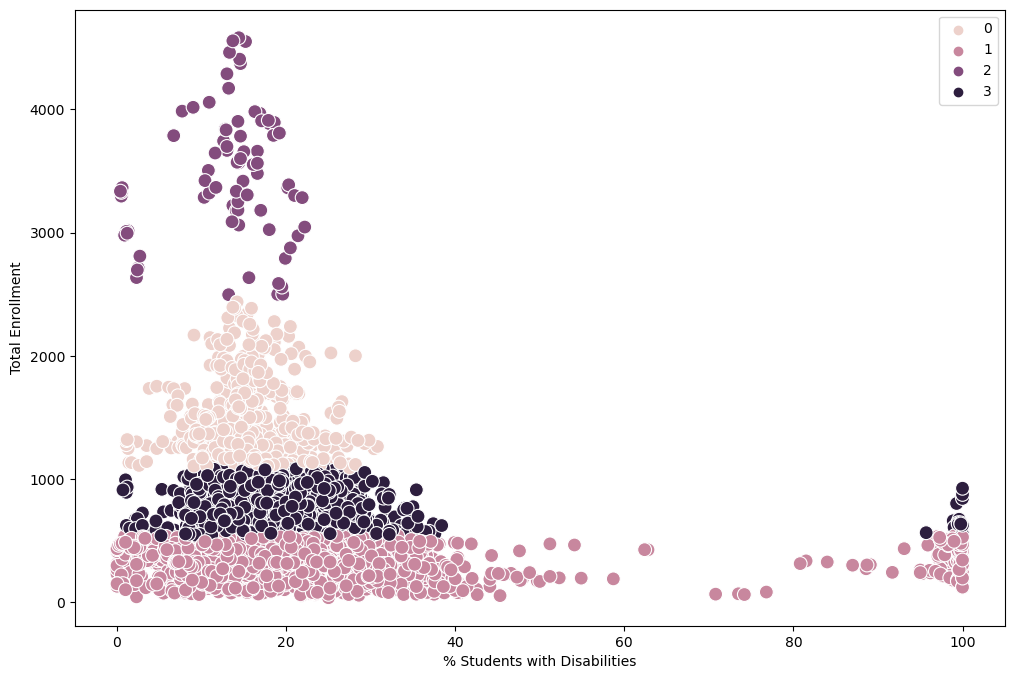

In [22]:
# Plot the clusters for the "Total Enrollment" and "Students with Disabilities" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['% Students with Disabilities'], y = sub['Total Enrollment'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('% Students with Disabilities')
plt.ylabel('Total Enrollment')
plt.show()

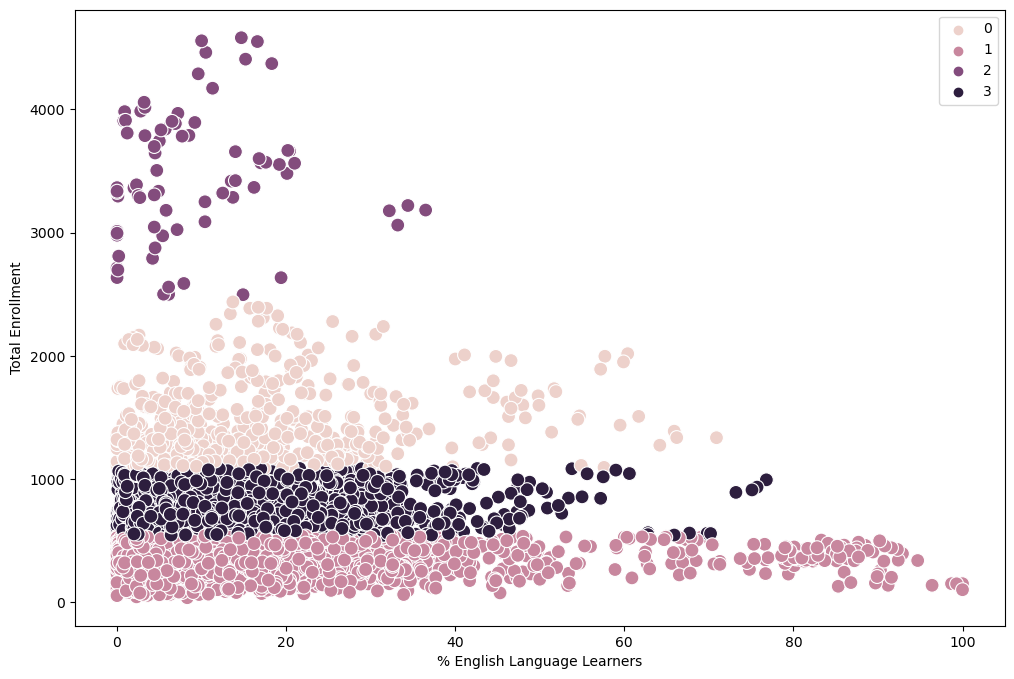

In [23]:
# Plot the clusters for the "Total Enrollment" and "English Language Learners" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['% English Language Learners'], y = sub['Total Enrollment'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('% English Language Learners')
plt.ylabel('Total Enrollment')
plt.show()

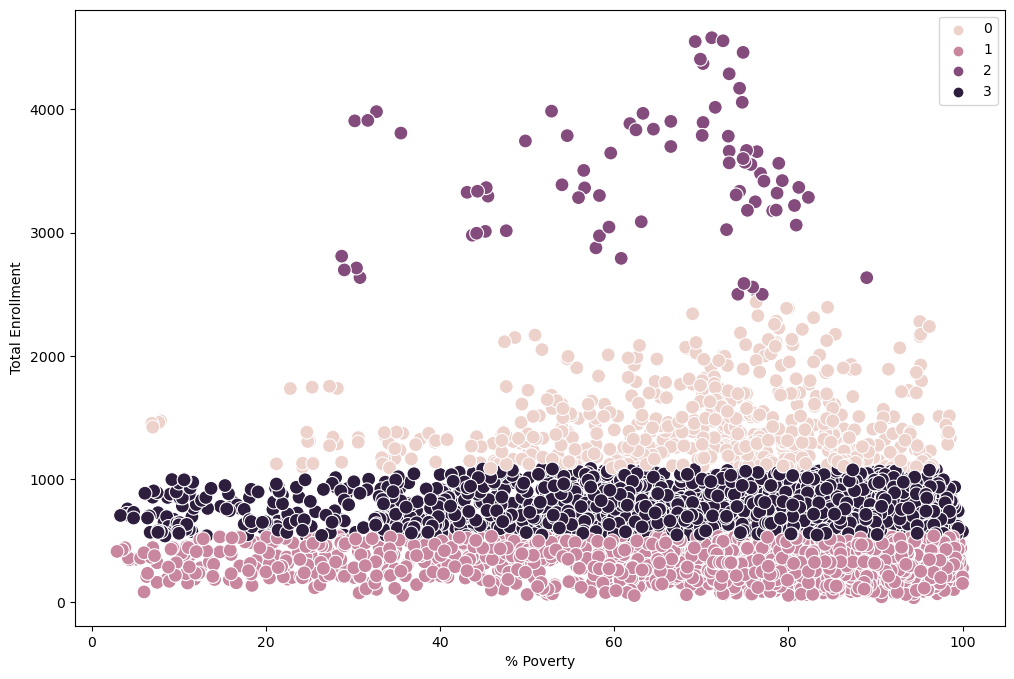

In [24]:
# Plot the clusters for the "Total Enrollment" and "Poverty" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['% Poverty'], y = sub['Total Enrollment'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('% Poverty')
plt.ylabel('Total Enrollment')
plt.show()

# Insights
- The above scatterplot you can see that there is wide ranges of economic need in the clusters coded as "0" and "2" in the legend but there aren't any enrollement above 2000. This cluster also represents the lowest enrollment lower to equal of 1000. While the cluster coded "3" in the legend falls higher in enrollment there are hardly any below 20 in the economic need index. They also tend to fall within the 40 - 80 economic need index. Lastly in cluster "1" in the legend contains the highest enrollment with some extreme values on top but doesn't fall in the economic need index <20 and >80, making this a non-linear dependency.  

- The first cluster coded "0" in the legend has the most populated students with disablilty but the lowest enrollment. It has a wider range of students with disability >40. Similar second cluster coded "2" in the legend has low enrollment of student with disabilities falling within 0 - 20 in the disablity range. In cluster coded as "3" has higher enrollment > 2000 but very few student with disability range over 25. The last cluster coded "1" has the greatest enrollment but fewer student with disabilities within the range of 0 - 20, making this a non-linear.

- The findings suggest Lower economic need areas tend to have higher enrollments, while higher economic need areas show lower enrollments. The implications of economic need influences enrollment, but other factors like location and community demographics also play a role. Understanding these dynamics is crucial for targeted interventions to address enrollment disparities and support diverse student needs. Overall, the analysis highlights the complex interplay between economic need and enrollment, emphasizing the importance of holistic approaches to educational equity and access. 

# Descriptive statistics

In [25]:
# Create a column that renames the clusters to colors

sub.loc[sub['clusters'] == 3, 'cluster'] = 'black'
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/bw/cptkzcgn0rg6xj7czmdw2bl80000gn/T/ipykernel_32075/1157687693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 3, 'cluster'] = 'black'


In [26]:
sub.groupby('cluster').agg({'% Economic Need Index':['mean', 'median'], 
                         '% Students with Disabilities':['mean', 'median'], 
                         '% English Language Learners':['mean', 'median'],
                          '% Poverty':['mean', 'median'],
                           'Total Enrollment':['mean', 'median']})

% Economic Need Index        % Students with Disabilities         \
                         mean median                         mean median   
cluster                                                                    
black               62.673368  67.60                    19.601686   18.3   
dark                51.351282  52.30                    13.144872   14.3   
pink                59.952305  62.55                    15.749291   15.6   
purple              71.590874  75.90                    24.607955   21.7   

        % English Language Learners         % Poverty        Total Enrollment  \
                               mean median       mean median             mean   
cluster                                                                         
black                     12.964419   9.90  71.274406  76.90       736.146563   
dark                       9.000000   6.10  63.620513  70.15      3458.615385   
pink                      15.776773  12.65  69.962057  73.10      1437.372340   
purple                    13.484615   9.00  78.114644  82.60       347.128046   

                 
         median  
cluster          
black     698.0  
dark     3403.0  
pink     1344.5  
purple    355.0

# Conclusions

The subgroup analysis by cluster indicates significant variations in socio-economic indicators and enrollment metrics. Among the clusters, "pink" emerges as particularly noteworthy, characterized by the highest economic need index, poverty rate, and percentage of students with disabilities, despite having the lowest total enrollment. In contrast, cluster "purple" exhibits the highest total enrollment but comparatively lower levels of economic need and poverty. Clusters "black" and "dark" fall somewhere in between, showing moderate economic need and poverty rates, with "black" demonstrating a higher proportion of English language learners. These findings underscore the necessity for tailored interventions suited to the unique socio-economic contexts and enrollment dynamics within each cluster.

# Proposal

These findings offer valuable guidance for shaping future steps in education planning and policymaking. They help us understand where resources and support are most needed and where improvements can be made. For instance, in areas where there's a high economic need and many students with disabilities but low enrollment (like the "pink" cluster), we might want to focus on providing more assistance and resources to ensure all students have equal opportunities. On the other hand, places with high enrollment but lower economic need (the "purple" cluster) could concentrate on enhancing the quality of education and tailoring learning experiences to individual needs. These insights pave the way for better prediction of future enrollment trends, helping schools and policymakers allocate resources more effectively. They also emphasize the importance of ongoing evaluation to see how well interventions are working and where adjustments might be needed to improve educational outcomes for everyone.

In [27]:
# Export the dataframe to pkl file

df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'hardship_enrollment.pkl'))
sub.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'clusters.pkl'))

In [ ]:
# Export the dataframe to csv file

df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'hardship_enrollment.csv'))
sub.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clusters.csv'))